In [26]:
serie2 = '../data/submissions/serie2.csv'
SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/serie5.csv',
    'best_1dcnn': '../data/submissions/submission_405.csv',
    'best_gnn': '../data/submissions/best_gnn.csv',
}

SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/xgb_398.csv',
    'their_xgb': '../data/submissions/serie5.csv',
    '1dcnn': '../data/submissions/submission_409_morning_sweep.csv',
}

# SUBMISSIONS = {
#     '435': '../data/submissions/submission_435.csv',
#     '430': '../data/submissions/submission_430.csv',
#     '405': '../data/submissions/submission_405.csv',
#     'best_1dcnn': '../data/submissions/best_1dcnn.csv',
# }

# Unknown
SUBMISSIONS = {
    'morning-sweep': '../data/submissions/u_090_morning_sweep_409.csv',
    'ensemble': '../data/submissions/u_125_submission_443.csv',
    'pseudo' : '../data/submissions/u_bbstrat.csv',
    'xgb': '../data/submissions/u_xgb_344.csv',
    'public_notebook_448': '../data/submissions/public_notebook_448_u_138.csv',
    'submission_unknown_only': '../data/submissions/submission_unknown_only.csv',
}

# SUBMISSIONS = {
#     'fold_0': '../data/submissions/divine_sweep_cv_fold_0.csv',
#     'cv_ensemble': '../data/submissions/divine_sweep_cv_ensemble_392.csv',
# }

# SUBMISSIONS = {
#     'sub_1': '../data/submissions/448/sub_1.csv',
#     'sub_2': '../data/submissions/448/sub_2.csv',
#     'sub_3': '../data/submissions/448/sub_3.csv',
#     'sub_4': '../data/submissions/448/sub_4.csv',
#     'sub_5': '../data/submissions/448/sub_5.csv',
#     'lgbm': serie2,
#     'autogluon': '../data/submissions/serie3.csv',
#     'automl': '../data/submissions/serie4.csv',
#     'xgb': '../data/submissions/serie5.csv',
#     'best_1dcnn': '../data/submissions/submission_405.csv',
#     'cv_ensemble': '../data/submissions/divine_sweep_cv_ensemble_392.csv',
# }


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Load test parquet
test_data = pd.read_parquet('../data/raw/test.parquet')

In [29]:
test_data = test_data.drop(columns=['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles'])

In [30]:
# Add submissions
for submission_name, submission_path in SUBMISSIONS.items():
    submission = pd.read_csv(submission_path)
    test_data[submission_name + '_binds'] = submission['binds']

In [31]:
test_data

,id,protein_name,morning-sweep_binds,ensemble_binds,pseudo_binds,xgb_binds,public_notebook_448_binds
0,295246830,BRD4,0.000916,0.151291,1.373597e-04,0.001731,0.092253
1,295246831,HSA,0.001807,0.111352,2.336706e-04,0.006052,0.068691
2,295246832,sEH,0.000001,0.070111,8.080803e-07,0.000112,0.025533
3,295246833,BRD4,0.000559,0.151305,1.907910e-04,0.004166,0.100723
4,295246834,HSA,0.001510,0.135084,2.122983e-03,0.002761,0.096126
...,...,...,...,...,...,...,...
1674891,296921721,HSA,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1674892,296921722,sEH,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1674893,296921723,BRD4,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1674894,296921724,HSA,0.000000,0.000000,0.000000e+00,0.000000,0.000000


,morning-sweep_binds,ensemble_binds,pseudo_binds,xgb_binds,public_notebook_448_binds
morning-sweep_binds,1.000000,0.190436,0.393391,0.114960,0.170896
ensemble_binds,0.190436,1.000000,0.076212,0.304524,0.880289
pseudo_binds,0.393391,0.076212,1.000000,0.105440,0.125550
xgb_binds,0.114960,0.304524,0.105440,1.000000,0.319376
public_notebook_448_binds,0.170896,0.880289,0.125550,0.319376,1.000000


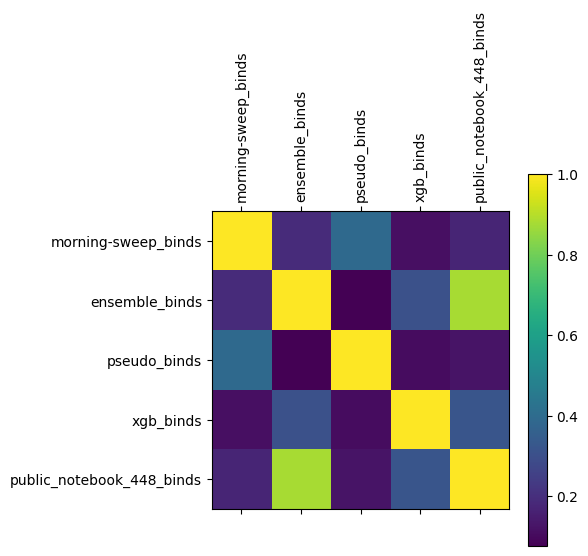

In [32]:
# Calculate similarity between submissions
submissions = test_data[[name + '_binds' for name in SUBMISSIONS.keys()]]
display(submissions.corr())
# Draw correlation matrix with labels
plt.matshow(submissions.corr())
plt.xticks(range(submissions.shape[1]), submissions.columns, fontsize=10, rotation=90)
plt.yticks(range(submissions.shape[1]), submissions.columns, fontsize=10)
plt.colorbar()
plt.show()

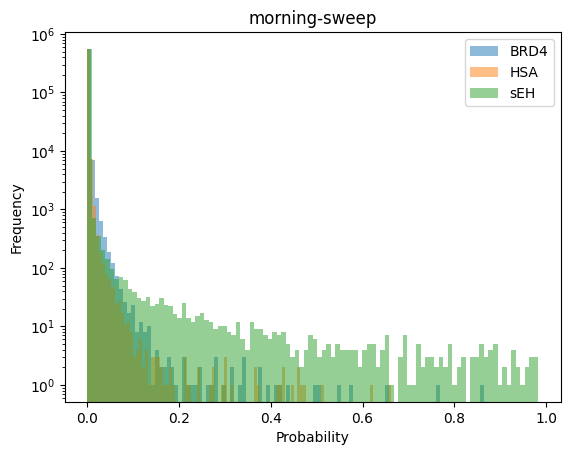

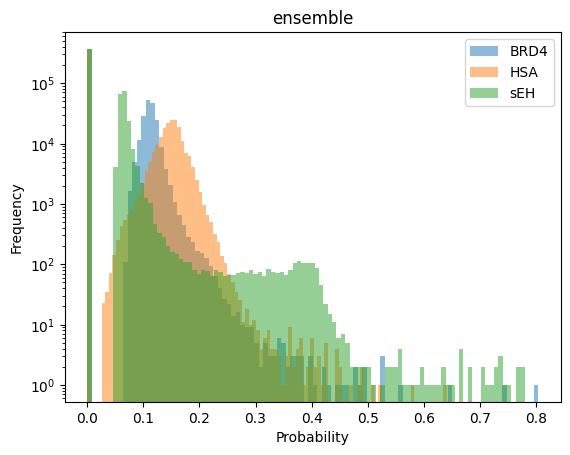

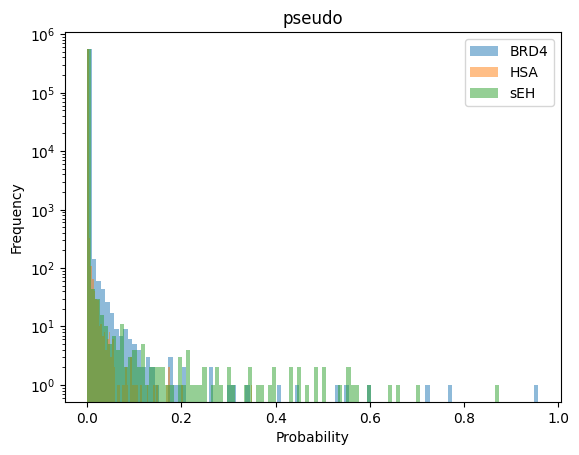

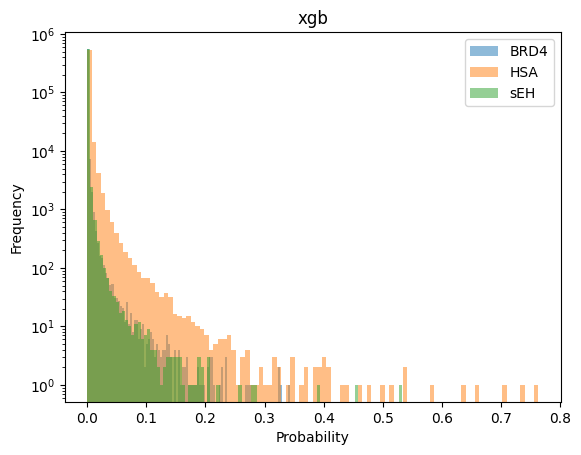

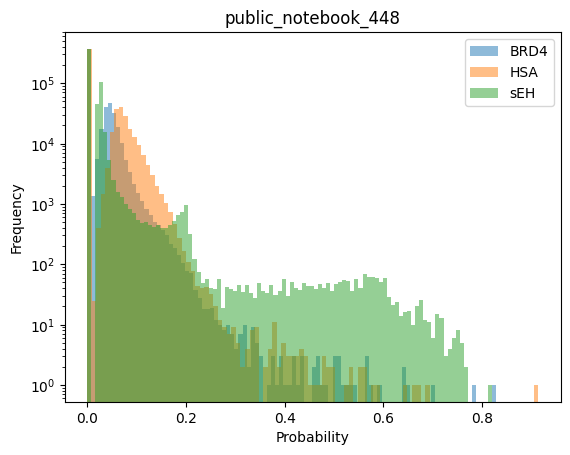

In [33]:
# Plot histogram of binding affinity to frequency for each submission and split on protein name
for submission_name in SUBMISSIONS.keys():
    plt.figure()
    plt.hist(test_data[test_data['protein_name'] == "BRD4"][submission_name + '_binds'], alpha=0.5, bins=100, label='BRD4')
    plt.hist(test_data[test_data['protein_name'] == "HSA"][submission_name + '_binds'], alpha=0.5, bins=100, label='HSA')
    plt.hist(test_data[test_data['protein_name'] == "sEH"][submission_name + '_binds'], alpha=0.5, bins=100, label='sEH')
    plt.yscale('log')
    plt.title(submission_name)
    plt.legend(loc="upper right")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()